#Import Libraries and Load Dataset

In [80]:
#Load libraries
#Data processing and Data Manipulation
import pandas as pd
#Calculation & array usage
import numpy as np
#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from nltk.corpus import stopwords


df = pd.read_csv("/content/Student_Responces.csv")

#Data Preprocessing

In [81]:
df.head()

,Gender,Are you confident in your chosen career path?,What factors affect your career decision-making process?,How_did you_choose_your_career_path?,Have you sought advice from a career counselor or career advisor?,Did you face pressure in choosing a career path?,Do you think your current career choice aligns with your skills and strengths?,Have you ever thought that the path you have chosen is not suitable for you? You could have done better if you had chosen another path.,"If you realize that your initially chosen career path is not suitable for you, are you confident in shifting to a different career path?",Do you believe that choosing the wrong career path can lead to academic failure?,Do you think schools/colleges should offer career counseling and guidance programs?,"In your opinion, what can educational institutions do to help students choose their career paths more effectively? (Open-ended)"
0,Male,Yes,Passion for a specific field,Based on personal interests and passion,No,Yes,Yes,Yes,No,Yes,Yes,NaN
1,Male,Yes,Job market trends,Talked to friends/family,No,No,Yes,No,No,Yes,Yes,NaN
2,Male,No,Passion for a specific field,Based on financial stability,No,Yes,No,Yes,Yes,Yes,Yes,NaN
3,Female,Yes,Passion for a specific field,Talked to friends/family,No,No,No,Yes,No,Yes,Yes,NaN
4,Male,Yes,Financial stability,Based on financial stability,No,Yes,No,Yes,Yes,No,Yes,NaN


In [82]:
new_column_names = {
    'Gender':'gender',
    'Are you confident in your chosen career path?': 'confidence_in_career',
    'What factors affect your career decision-making process?': 'career_decision_factors',
    'How did you choose your career path?': 'career_choice_process',
    'Have you sought advice from a career counselor or career advisor?': 'career_advice_sought',
    'Did you face pressure in choosing a career path?': 'career_choice_pressure',
    'Do you think your current career choice aligns with your skills and strengths?': 'career_alignment',
    'Have you ever thought that the path you have chosen is not suitable for you? You could have done better if you had chosen another path.': 'doubts_about_career',
    'If you realize that your initially chosen career path is not suitable for you, are you confident in shifting to a different career path?': 'confidence_in_switching_career',
    'Do you believe that choosing the wrong career path can lead to academic failure?': 'career_path_and_academic_failure',
    'Do you think schools/colleges should offer career counseling and guidance programs?': 'school_career_counseling',
    'In your opinion, what can educational institutions do to help students choose their career paths more effectively? (Open-ended)': 'educational_institution_support'
}

df.rename(columns=new_column_names, inplace=True)

In [83]:
column_to_drop = ['educational_institution_support']
df.drop(column_to_drop, axis=1, inplace=True)

In [84]:
# Create a mapping of the values to integers
mapping = {
    'Parental expectations': 1,
    'Passion for a specific field': 2,
    'Financial stability': 3,
    'Job market trends': 4,
    'Other': 5
}

# Replace the values in the 'career_decision_factors' column with the mapped integers
df['career_decision_factors'] = df['career_decision_factors'].replace(mapping)

In [85]:
# Create a mapping of the values to the given options
mapping = {
    'Talked to friends/family': 1,
    'Based on financial stability': 2,
    'Through professional counseling': 3,
    'Based on personal interests and passion': 4,
    'Considering my educational background and qualifications': 5,
    'Other': 6
}

# Replace the values in the 'How did you choose your career path?' column with the mapped integers
df['How_did you_choose_your_career_path? '] = df['How_did you_choose_your_career_path? '].replace(mapping)

In [86]:
mapping = {
    'gender': {'Male': 1, 'Female': 0},
    'confidence_in_career': {'Yes': 1, 'No': 0},
    'career_advice_sought': {'Yes': 1, 'No': 0},
    'career_choice_pressure': {'Yes': 1, 'No': 0},
    'career_alignment': {'Yes': 1, 'No': 0},
    'doubts_about_career': {'Yes': 1, 'No': 0},
    'confidence_in_switching_career': {'Yes': 1, 'No': 0},
    'career_path_and_academic_failure': {'Yes': 1, 'No': 0},
    'school_career_counseling': {'Yes': 1, 'No': 0},

}

# Map the values in the specified columns using the mapping dictionary
df = df.replace(mapping)

In [87]:
df.columns

Index(['gender', 'confidence_in_career', 'career_decision_factors',
       'How_did you_choose_your_career_path? ', 'career_advice_sought',
       'career_choice_pressure', 'career_alignment', 'doubts_about_career',
       'confidence_in_switching_career', 'career_path_and_academic_failure',
       'school_career_counseling'],
      dtype='object')

In [88]:
# Define the file path for the new CSV file
file_path = "processed_data.csv"

# Save data to the new CSV file in the current directory
df.to_csv(file_path, index=False)

print("Data saved to", file_path)

Data saved to processed_data.csv


#Exploratory Analysis

In [89]:
columns_to_visualize = ['gender', 'confidence_in_career', 'career_decision_factors',
                         'How_did you_choose_your_career_path? ', 'career_advice_sought',
                         'career_choice_pressure', 'career_alignment', 'doubts_about_career',
                         'confidence_in_switching_career', 'career_path_and_academic_failure',
                         'school_career_counseling']

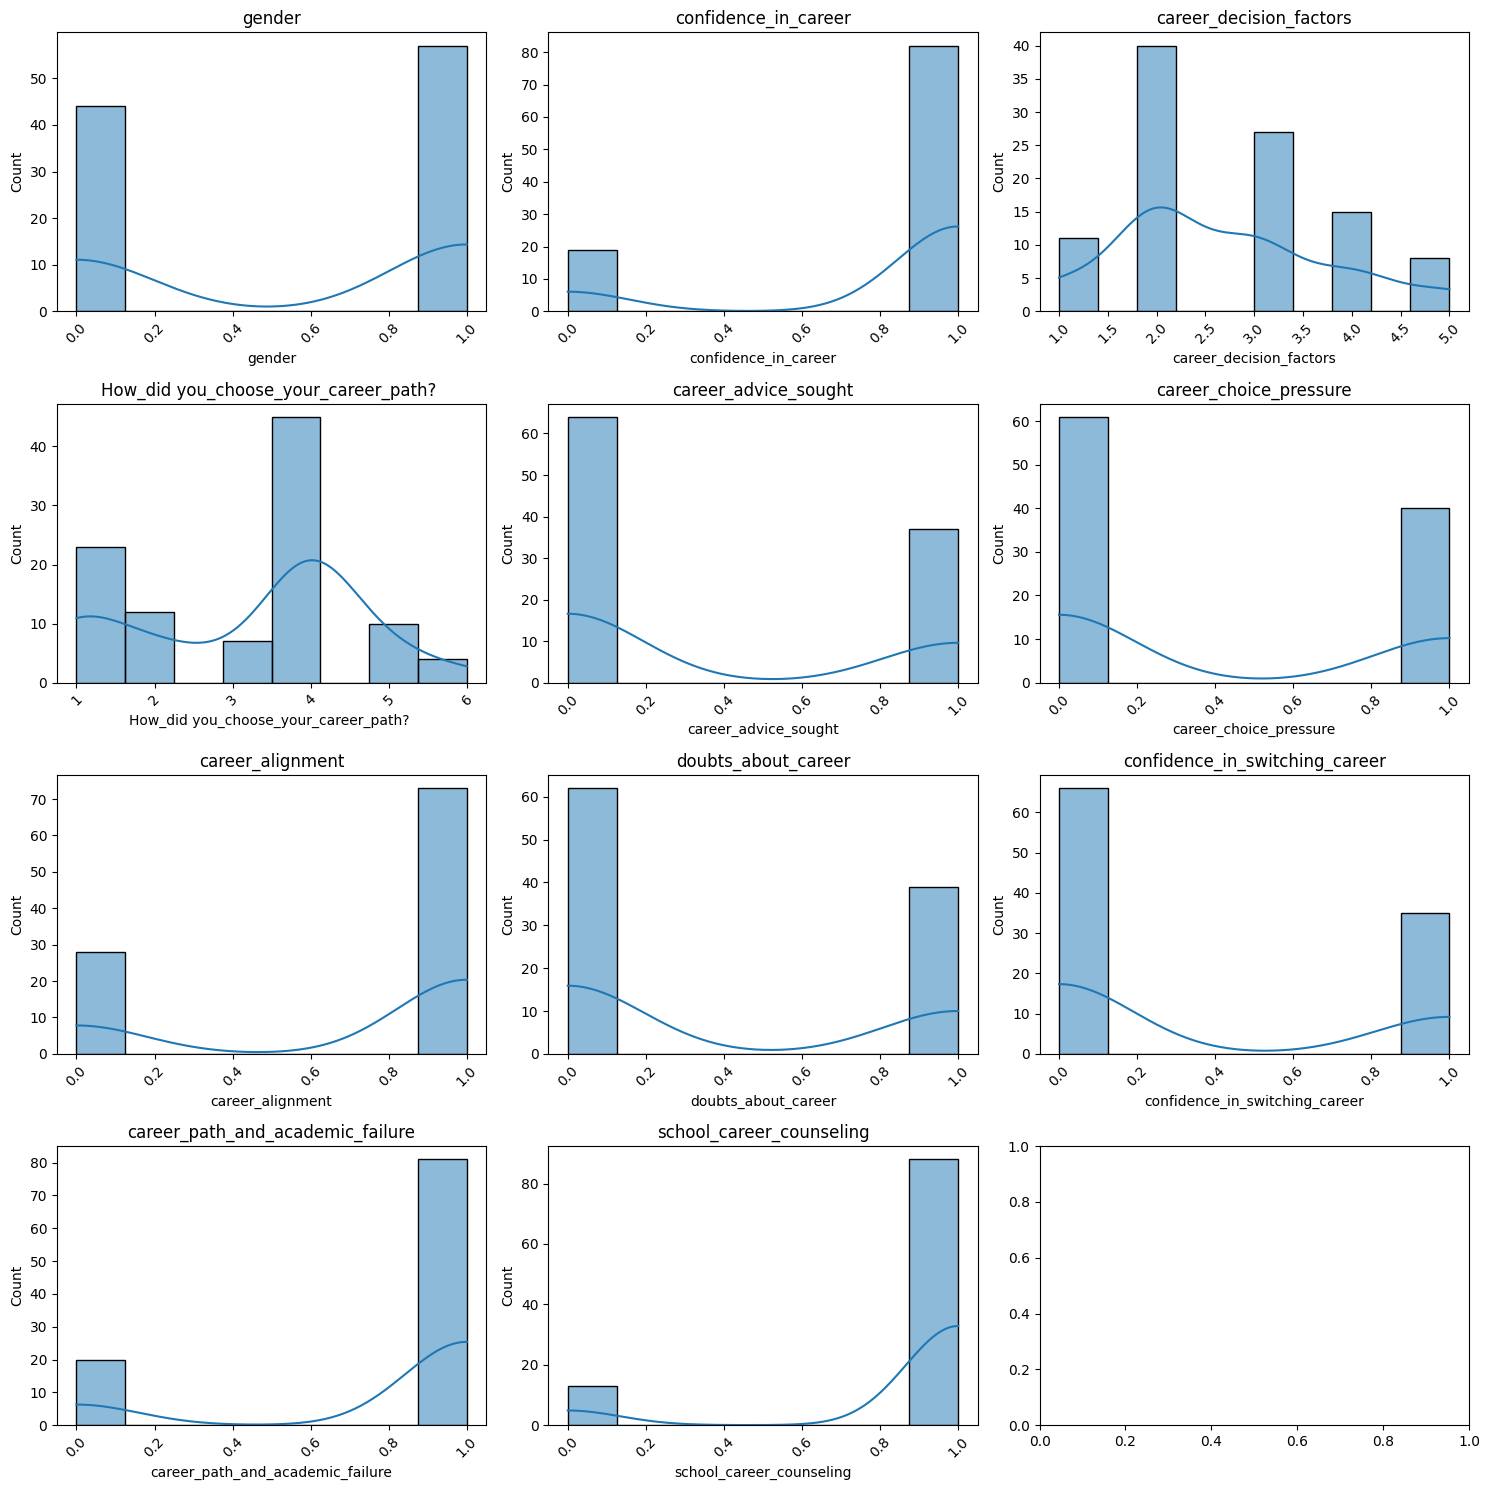

In [90]:
fig, axes = plt.subplots(4, 3, figsize=(15, 15))

axes = axes.flatten()

# Loop through the columns and create subplots
for i, column in enumerate(columns_to_visualize):
    sns.histplot(data=df[column], kde=True, ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_xlabel(column)
    axes[i].tick_params(axis='x', labelrotation=45)

plt.tight_layout()
plt.show()

In [91]:
df['gender'].value_counts()

1    57
0    44
Name: gender, dtype: int64

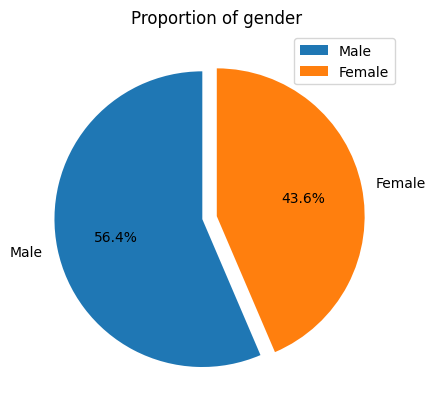

In [92]:
plt.pie(df['gender'].value_counts(),labels = ["Male","Female"],autopct ="%.01f%%",explode=[0.1, 0],startangle=90)
plt.legend(["Male","Female"])
plt.title('Proportion of gender')
plt.show()

Are you confident in your chosen career path?

In [93]:
df['confidence_in_career'].value_counts()

1    82
0    19
Name: confidence_in_career, dtype: int64

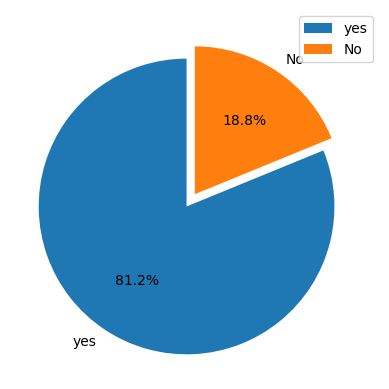

In [94]:
plt.pie(df['confidence_in_career'].value_counts(),labels = ["yes","No"],autopct ="%.01f%%",explode=[0.1, 0],startangle=90)
plt.legend(["yes","No"])
plt.show()

What factors effect your career decision-making process?



In [95]:
df['career_decision_factors'].value_counts()

2    40
3    27
4    15
1    11
5     8
Name: career_decision_factors, dtype: int64

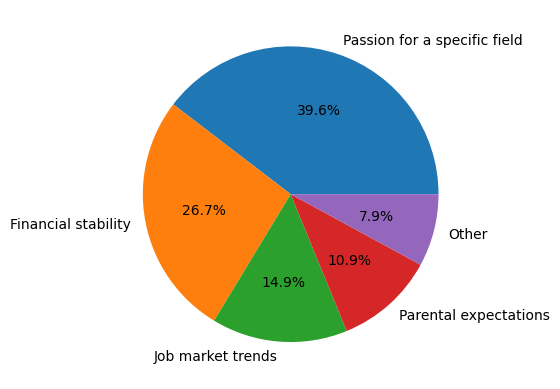

In [96]:
plt.pie(df['career_decision_factors'].value_counts(),labels = ["Passion for a specific field","Financial stability","Job market trends","Parental expectations","Other"],autopct ="%.01f%%")
plt.show()

How did you choose your career path?



In [97]:
df['How_did you_choose_your_career_path? '].value_counts()

4    45
1    23
2    12
5    10
3     7
6     4
Name: How_did you_choose_your_career_path? , dtype: int64

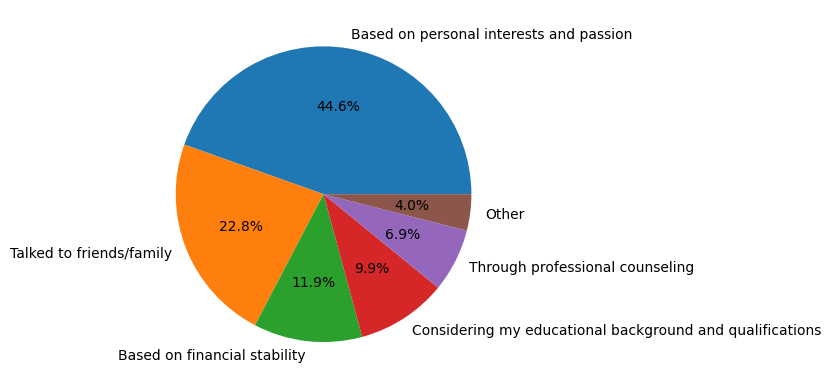

In [98]:
plt.pie(df['How_did you_choose_your_career_path? '].value_counts(),labels = ["Based on personal interests and passion","Talked to friends/family","Based on financial stability","Considering my educational background and qualifications","Through professional counseling","Other"],autopct ="%.01f%%")
plt.show()

Have you sought advice from a career counselor or career advisor?

In [99]:
df['career_advice_sought'].value_counts()

0    64
1    37
Name: career_advice_sought, dtype: int64

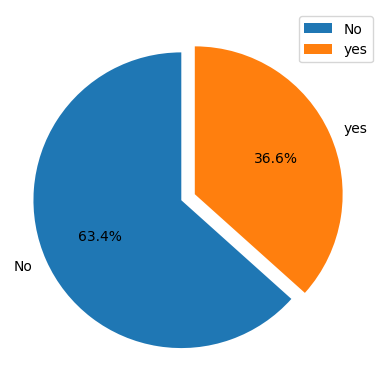

In [100]:
plt.pie(df['career_advice_sought'].value_counts(),labels = ["No","yes"],autopct ="%.01f%%",explode=[0.1, 0],startangle=90)
plt.legend(["No","yes"])
plt.show()

Did you face pressure in choosing a career path?

In [101]:
df['career_choice_pressure'].value_counts()

0    61
1    40
Name: career_choice_pressure, dtype: int64

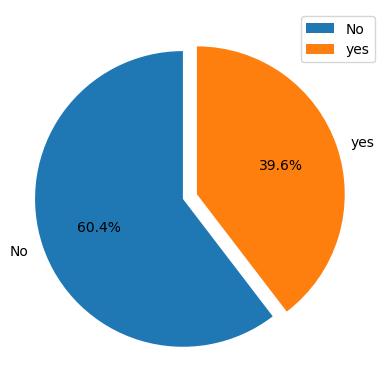

In [102]:
plt.pie(df['career_choice_pressure'].value_counts(),labels = ["No","yes"],autopct ="%.01f%%",explode=[0.1, 0],startangle=90)
plt.legend(["No","yes"])
plt.show()

Do you think your current career choice aligns with your skills and strengths?



In [103]:
df['career_alignment'].value_counts()

1    73
0    28
Name: career_alignment, dtype: int64

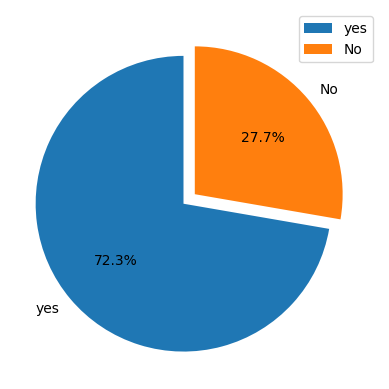

In [104]:
plt.pie(df['career_alignment'].value_counts(),labels = ["yes","No"] ,autopct ="%.01f%%",explode=[0.1, 0],startangle=90)
plt.legend(["yes","No"])
plt.show()

Have you ever thought that the path you have chosen is not suitable for you? You could have done better if you had chosen another path.

In [105]:
df['doubts_about_career'].value_counts()

0    62
1    39
Name: doubts_about_career, dtype: int64

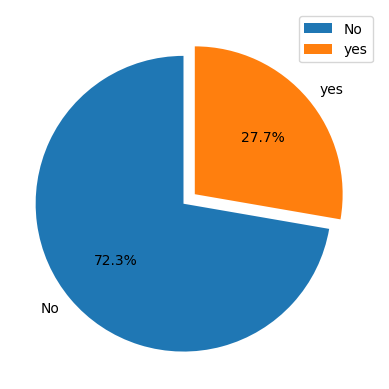

In [106]:
plt.pie(df['career_alignment'].value_counts(),labels = ["No","yes"] ,autopct ="%.01f%%",explode=[0.1, 0],startangle=90)
plt.legend(["No","yes"])
plt.show()

If you realize that your initially chosen career path is not suitable for you, are you confident in shifting to a different career path?

In [107]:
df['confidence_in_switching_career'].value_counts()

0    66
1    35
Name: confidence_in_switching_career, dtype: int64

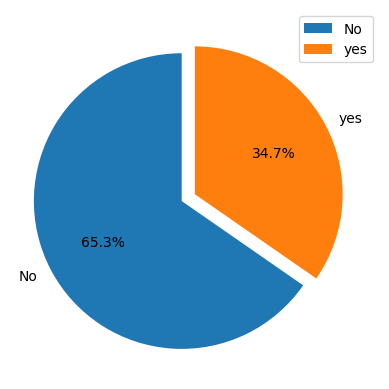

In [108]:
plt.pie(df['confidence_in_switching_career'].value_counts(),labels = ["No","yes"] ,autopct ="%.01f%%",explode=[0.1, 0],startangle=90)
plt.legend(["No","yes"])
plt.show()

Do you believe that choosing the wrong career path can lead to academic failure?

In [109]:
df['career_path_and_academic_failure'].value_counts()

1    81
0    20
Name: career_path_and_academic_failure, dtype: int64

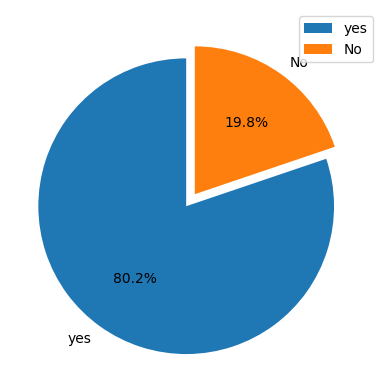

In [110]:
plt.pie(df['career_path_and_academic_failure'].value_counts(),labels = ["yes","No"] ,autopct ="%.01f%%", explode=[0.1, 0],startangle=90)
plt.legend(["yes","No"])
plt.show()

Do you think schools/colleges should offer career counseling and guidance programs?

In [111]:
df['school_career_counseling'].value_counts()

1    88
0    13
Name: school_career_counseling, dtype: int64

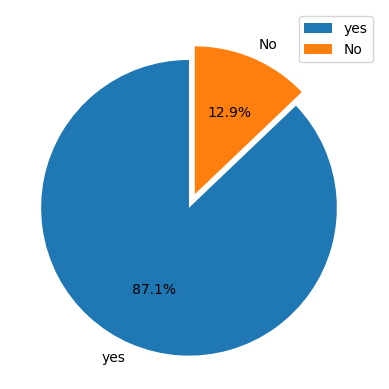

In [112]:
plt.pie(df['school_career_counseling'].value_counts(),labels = ["yes","No"] ,autopct ="%.01f%%", explode=[0.1, 0],startangle=90)
plt.legend(["yes","No"])
plt.show()

In [113]:
df.columns

Index(['gender', 'confidence_in_career', 'career_decision_factors',
       'How_did you_choose_your_career_path? ', 'career_advice_sought',
       'career_choice_pressure', 'career_alignment', 'doubts_about_career',
       'confidence_in_switching_career', 'career_path_and_academic_failure',
       'school_career_counseling'],
      dtype='object')

Fetch all the data from the column chool_career_counseling and save it in a variable for further analysis.



#Sentiment analysis

In your opinion, what can educational institutions do to help students choose their career paths more effectively? (Open-ended)

In [114]:
data =  """
 our school system is not perfect, and almost students do not know about what they can do in our practical life, they have no dreams. Therefore, we are not successful.

I think educational institutes must develop the students' minds in such a crystal & clear way that students do not feel shyness in choosing a career of their own interest. A teacher builds a Strong-Mind(Bull-Head). So, the role of the teacher is important to produce a "Strong and Healthy Mind Nation."

They should offer career counseling to students, make sessions

There should be the need for career counselors who timely motivate the students to choose the right path

N/A

My opinion is that there is a career counseling team made by the government in every college and university to give the true direction about the future of students.

Very good opinion

Every educational institution should learn the students that any career is not wrong; it's totally dependent upon you, how much your struggle involves in achieving that career.

Institutes should arrange career counseling sessions for students

Only teach Students and make it effective

Test their skills

A perfect career counseling session to let the students select their profession according to their interest.

Yes

Must provide career counseling and guidance. They must aware students of the best opportunities for their career according to their skills.

Encourage passions of students

There must be some practical activities for students. Based on the interest of students in these activities, they must select their field.

There should be proper career counseling of a student before choosing their academic career.

After getting the admissions, there should be counseling sessions so if anyone makes their mind so he should easily switch.

According to my opinion, educational institutions should organize career counseling seminars and sessions, then invite successful and most dedicated personalities of this era to motivate its students.

FIRST OF ALL, every student has its own willing and parental pressure. But there are no concepts of career counseling in Pakistan schools and colleges. Therefore, the student does not take great achievements and success; they fall into failure. That's why... my suggestion is that in every school and college, there must be extra lectures about career counseling. Then the student will decide the right path, what they can do in their future...

There should be a career counseling program in schools and colleges because students face difficulties in choosing the right profession.

Educational institutions should offer career counseling and guidance programs.

Students' interests matter. What kind of field they choose

Sorry 😐

In my opinion, teachers should also guide job opportunities in this field.

There should be a keen and thorough counseling from the school level. Teachers should identify one's skills and encourage them to pursue whatever a student wants besides any pressure.

They should motivate students & tell them about the opportunities they can get.

Career counseling is today's basic need for every student to choose the best career.

Yes

..

Check students' interest and guide them

I think we need to strengthen our school system. If our base was strong, it helps us in our practical life, and we will succeed.
"""

In [119]:
# Tokenize the text data
tokens = word_tokenize(data.lower())

In [122]:
# Remove stopwords (common words like 'the', 'and', 'is', etc.)
stop_words = set(stopwords.words('english'))
filtered_tokens = [token for token in tokens if token.isalnum() and token not in stop_words]

In [123]:
# Create a word frequency dictionary
word_freq = nltk.FreqDist(filtered_tokens)

In [124]:
# Generate the Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

In [127]:
# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Function to perform sentimental analysis
def perform_sentiment_analysis(text_data):
    sentences = nltk.sent_tokenize(text_data)
    sentiment_scores = {
        'Positive': 0,
        'Neutral': 0,
        'Negative': 0,
        'Compound': 0
    }
    for sentence in sentences:
        score = sia.polarity_scores(sentence)
        sentiment_scores['Positive'] += score['pos']
        sentiment_scores['Neutral'] += score['neu']
        sentiment_scores['Negative'] += score['neg']
        sentiment_scores['Compound'] += score['compound']
    total_sentences = len(sentences)
    for key in sentiment_scores:
        sentiment_scores[key] /= total_sentences
    return sentiment_scores


Sentiment Scores:
Positive: 0.206
Neutral: 0.742
Negative: 0.052
Compound: 0.303


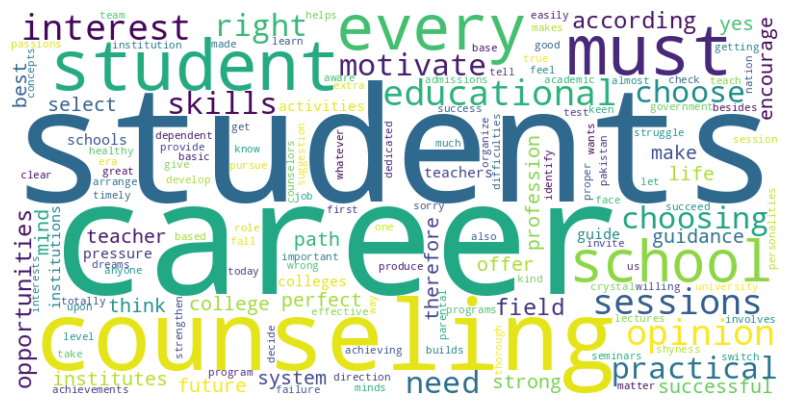

In [128]:
# Perform sentiment analysis on the text data
sentiment_scores = perform_sentiment_analysis(data)

# Display the results
print("Sentiment Scores:")
for key, value in sentiment_scores.items():
    print(f"{key}: {value:.3f}")

plt.show()
# Display the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()